In [1]:
import cv2
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
animal = 'DK79'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
CLEANED = os.path.join(DIR, 'CH1', 'thumbnail_cleaned')

In [7]:
def drawKeyPts(im, keyp, col, th):
    draw_shift_bits = 4
    draw_multiplier = 1 << 4
    LINE_AA = 16
    im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
    for curKey in keyp:
        center = (int(np.round(curKey.pt[0]*draw_multiplier)), int(np.round(curKey.pt[1]*draw_multiplier)))
        print(center)
        radius = int(np.round(curKey.size/2*draw_multiplier))
        cv2.circle(im, center, radius, col, thickness=th, lineType=LINE_AA, shift=draw_shift_bits)
        if(curKey.angle != -1):
            srcAngleRad = (curKey.angle * np.pi/180.0)
            orient = (int(np.round(np.cos(srcAngleRad)*radius)), int(np.round(np.sin(srcAngleRad)*radius)))
            cv2.line(im, center, (center[0]+orient[0], center[1]+orient[1]), col, 1, LINE_AA, draw_shift_bits)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    return gray


In [8]:
outpath = os.path.join(CLEANED, '001.tif')
orb = cv2.ORB_create(50)
img = cv2.imread(outpath, 0)
print(img.dtype, img.ndim, img.shape)

uint8 2 (2093, 3468)


In [9]:
keypoints, des = orb.detectAndCompute(img, None)
#img2 = cv2.drawKeypoints(img, keypoint, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2 = drawKeyPts(img, keypoints, (255,255,255), 5)
print(img2.dtype, img2.ndim, img2.shape)

(15568, 18880)
(26416, 25552)
(32624, 22400)
(16688, 21120)
(15984, 19456)
(16112, 19840)
(16160, 19776)
(28432, 15376)
(16112, 19808)
(15664, 19632)
(16496, 20448)
(14458, 13075)
(16166, 19776)
(34637, 22848)
(16685, 21120)
(39763, 12134)
(28435, 15379)
(16493, 20429)
(16493, 20986)
(14131, 14842)
(34629, 22833)
(28431, 15368)
(14239, 13018)
(28777, 16474)
(14446, 15529)
(39767, 12142)
(27164, 25021)
(15898, 20229)
(14239, 13022)
(17114, 11170)
(28782, 16451)
(34615, 22837)
(28422, 15372)
(38071, 15289)
(34604, 22826)
(28765, 16456)
(17120, 11148)
(28400, 15394)
(28831, 15925)
(34598, 22813)
(28745, 16443)
(17120, 11148)
(39574, 12063)
(34542, 22837)
(17104, 11132)
(28761, 16435)
(36023, 18107)
(28723, 16397)
(27347, 25054)
(36176, 18174)
uint8 2 (2093, 3468)


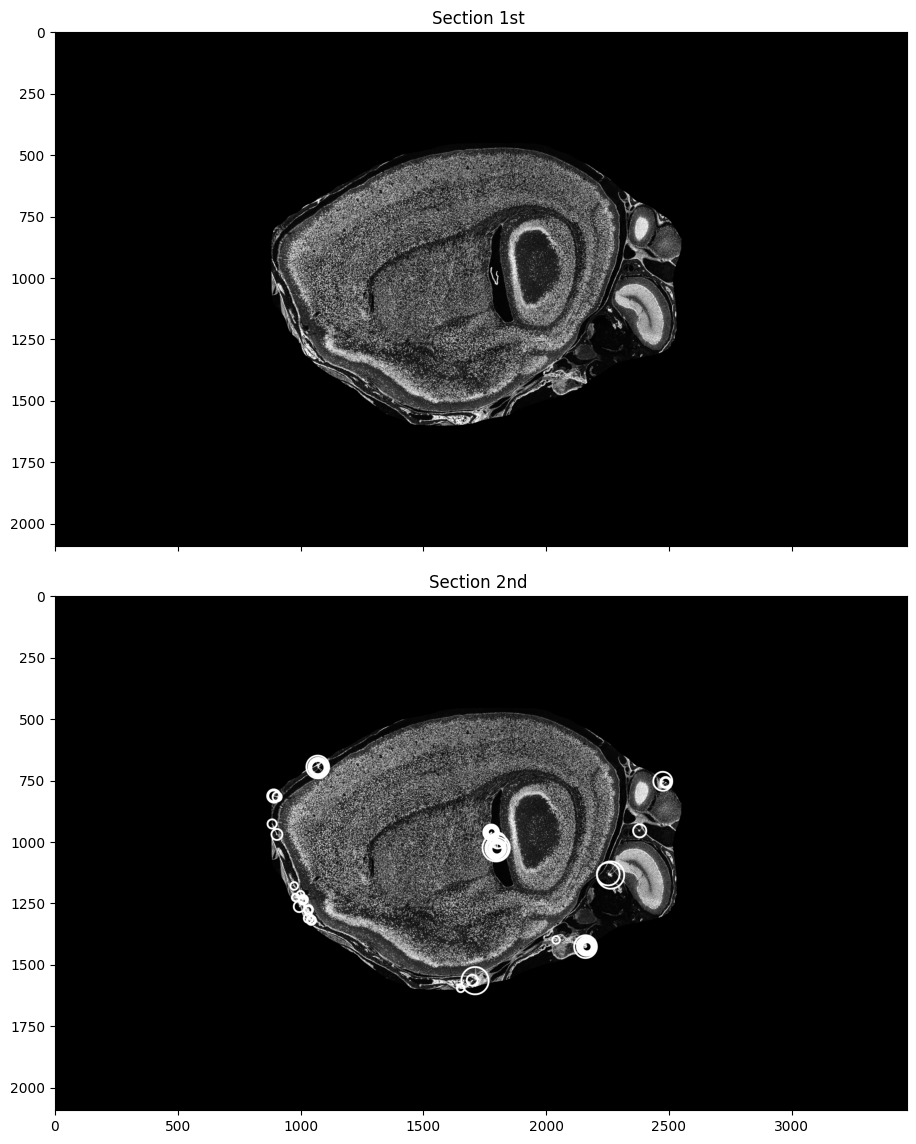

In [10]:
fig = plt.figure(figsize=(14., 14.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 1),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
for ax, im, title in zip(grid, [img, img2],
                        ['1st', '2nd']):
    # Iterating over the grid returns the Axes.
    ax.set_title('Section {0} '.format(title))
    ax.imshow(im, cmap="gray")

plt.show()